In [1]:
%matplotlib inline
import healpy
import os
import h5py

import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import matplotlib.lines as mlines
import matplotlib.colors as mcolors

plt.style.use("minimalist")

from fancy.plotting.allskymap_cartopy import AllSkyMapCartopy as AllSkyMap
from fancy.interfaces.stan import uv_to_coord
from fancy.plotting.colours import *

detector_type = "TA2015"

sim_output_file = "../../output/{0}_sim_{1}_{2}_{3}_{4}_notightB.h5".format(
        "joint_gmf", "SBG_23", detector_type, 19990308, "N")

'''set detector and detector properties'''
if detector_type == "TA2015":
    from fancy.detector.TA2015 import detector_params
elif detector_type == "auger2014":
    from fancy.detector.auger2014 import detector_params
elif detector_type == "auger2010":
    from fancy.detector.auger2010 import detector_params
else:
    raise Exception("Undefined detector type!")

with h5py.File(sim_output_file, "r") as f:
        print(f.keys())
        print(f["source"].keys())
        print(f["plotvars"].keys())
        print(f["detector/label"][()])

        src_indices = f["plotvars/src_indices"][()]
        bg_indices = f["plotvars/bg_indices"][()]

        coord_gb = uv_to_coord(f["plotvars/omega_gb"][()])
        coord_earth = uv_to_coord(f["plotvars/omega_earth"][()])
        coord_det_exp_limited = uv_to_coord(f["plotvars/omega_det_exp_limited"][()])
        coord_det = uv_to_coord(f["plotvars/omega_det"][()])

        energies_earth = f["plotvars/energies_earth"][()]
        energies_det_exp_limited = f["plotvars/energies_det_exp_limited"][()]
        energies_det = f["plotvars/energies_det"][()]

        map_unlensed = f["plotvars/map_unlensed"][()]
        map_lensed = f["plotvars/map_lensed"][()]
        energies_nlarge = f["plotvars/energies_nlarge"][()]
        coord_nlarge = uv_to_coord(f["plotvars/omega_nlarge"][()])

        coord_src = uv_to_coord(f["source/unit_vector"][()])

        # detector_params = f["detector"]


FileNotFoundError: [Errno 2] Unable to open file (unable to open file: name = '../../output/joint_gmf_sim_SBG_23_TA2015_19990308_N_notightB.h5', errno = 2, error message = 'No such file or directory', flags = 0, o_flags = 0)

In [ ]:
len(energies_det)

73

<Figure size 504x360 with 0 Axes>

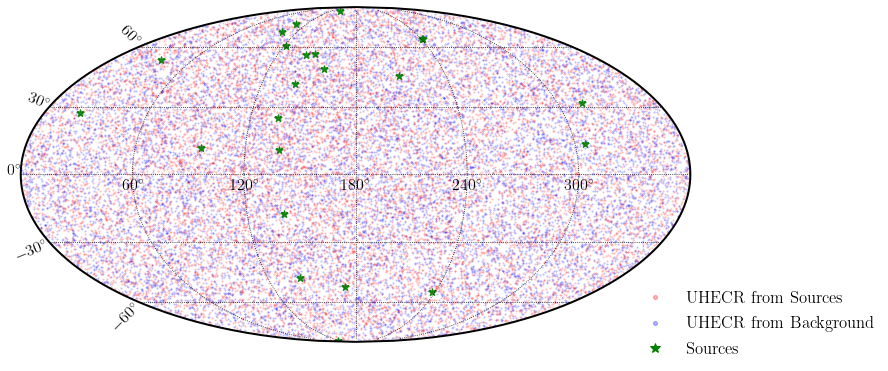

In [55]:
lons_gb, lats_gb = 180 - coord_gb.galactic.l.deg, coord_gb.galactic.b.deg
lons_src, lats_src = 180 - coord_src.galactic.l.deg, coord_src.galactic.b.deg

skymap = AllSkyMap(lon_0 = 180)
skymap.set_gridlines(color="k", linestyle=":", lw=10, zorder=1)
skymap.scatter(lons_gb[:100, src_indices], lats_gb[:100, src_indices], s=4.5, color="r", alpha=0.25, label="UHECR from Sources", lw=0)
skymap.scatter(lons_gb[:100, bg_indices], lats_gb[:100, bg_indices], s=4.5, color="b", alpha=0.25, label="UHECR from Background", lw=0)
skymap.scatter(lons_src, lats_src, s=60.0, color="g", alpha=0.9, marker="*", label="Sources")


handles = [mlines.Line2D([], [], color='r', marker='o', lw=0,
                          markersize=4, alpha=0.3, label="UHECR from Sources"),
           mlines.Line2D([], [], color='b', marker='o', lw=0,
                          markersize=4, alpha=0.3, label="UHECR from Background"),
            mlines.Line2D([], [], color='g', marker='*', lw=0,
                          markersize=10, label="Sources")]

skymap.legend(handles=handles, bbox_to_anchor=(0.9, 0.2)) 
# skymap.title("Skymap of vMF distributed UHECRs from Sources and Background")
skymap.save("test2.png",bbox_inches="tight", dpi=300)


<Figure size 504x360 with 0 Axes>

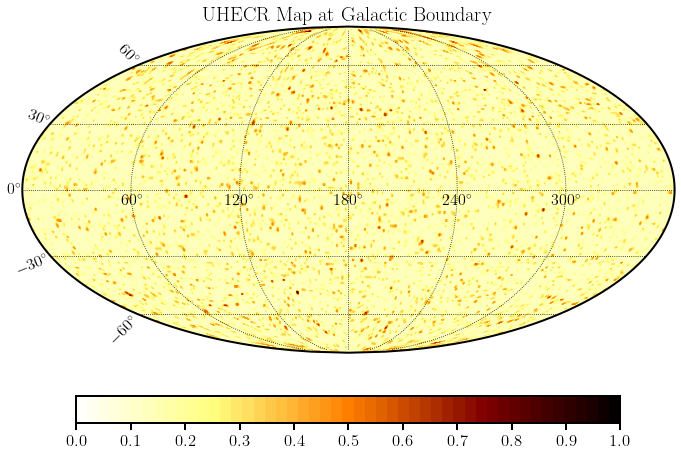

In [56]:
# healpy.mollview(map=map_unlensed, title='UHECR Map at Galactic Boundary', rot=(90, 0, 0), cmap=cm.hot)
ipixs = np.arange(0, 49152, 1, dtype=int)
th, ph = healpy.pix2ang(healpy.npix2nside(49152), ipixs)
lons_crmap, lats_crmap = -np.rad2deg(np.pi - ph), np.rad2deg(np.pi / 2. - th)


# UHECR at earth after lensing

max_count = int(np.max(map_unlensed))
from scipy.interpolate import griddata
import cartopy.crs as ccrs
import matplotlib.cm as cm

grid_lons, grid_lats = np.mgrid[-200:200:300j, -90:90:300j]

grid_map_unlensed = griddata((lons_crmap, lats_crmap), map_unlensed / max_count, (grid_lons, grid_lats), method="cubic", fill_value=0)

# energy_bins = np.arange(0, int(np.max(map_unlensed))+1, 1)
# uhecr_norm = mcolors.BoundaryNorm(energy_bins, cm.hot_r.N)


skymap = AllSkyMap(figsize=(15,8), lon_0=180)
skymap.set_gridlines(color="k", linestyle=":", lw=10, zorder=1)
im = skymap.ax.contourf(grid_lons, grid_lats, grid_map_unlensed, transform=ccrs.PlateCarree(), cmap=cm.afmhot_r, levels=np.linspace(0, 1, 50), alpha=1)
skymap.ax.set_facecolor('w')
skymap.title("UHECR Map at Galactic Boundary")
cbar = skymap.fig.colorbar(im,  pad=0.1,
                                cmap=cm.hot_r,
                                orientation='horizontal',
                                alpha=1, shrink=0.65)

# cbar.ax.set_xlim(0, int(np.max(map_unlensed))+1)
# cbar.ax.set_xticks(np.arange(0, int(np.max(map_unlensed))+1, 1))
cbar.set_ticks(np.arange(0, 1.1, 0.1))
cbar.set_ticklabels(["{0:.1f}".format(i) for i in np.arange(0, 1.1, 0.1)])

# cbar.set_alpha(im.alpha)
# cbar.draw_all()

In [45]:
# healpy.mollview(map=map_unlensed, title='UHECR Map at Galactic Boundary', rot=(90, 0, 0), cmap=cm.hot)
ipixs = np.arange(0, 49152, 1, dtype=int)
th, ph = healpy.pix2ang(healpy.npix2nside(49152), ipixs)
lons_crmap, lats_crmap = -np.rad2deg(np.pi - ph), np.rad2deg(np.pi / 2. - th)


# UHECR at earth after lensing

max_count = int(np.max(map_unlensed))
from scipy.interpolate import griddata
import cartopy.crs as ccrs
import matplotlib.cm as cm

grid_lons, grid_lats = np.mgrid[-180:180:300j, -90:90:300j]

grid_map_unlensed = griddata((lons_crmap, lats_crmap), map_unlensed / max_count, (grid_lons, grid_lats), method="cubic", fill_value=0)


<Figure size 504x360 with 0 Axes>

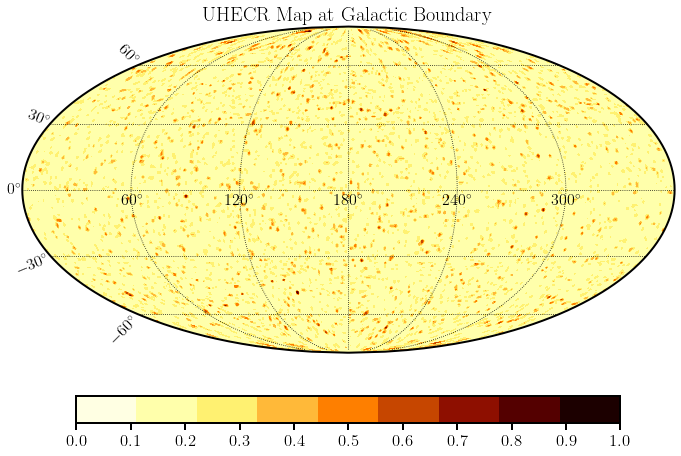

In [57]:

# energy_bins = np.arange(0, int(np.max(map_unlensed))+1, 1)
# uhecr_norm = mcolors.BoundaryNorm(energy_bins, cm.hot_r.N)


skymap = AllSkyMap(figsize=(15,8), lon_0=180)
skymap.set_gridlines(color="k", linestyle=":", lw=10, zorder=1)
im = skymap.contourf(grid_lons, grid_lats, grid_map_unlensed, cmap=cm.afmhot_r, levels=np.linspace(0, 1, 10), alpha=1)
skymap.ax.set_facecolor('w')
skymap.title("UHECR Map at Galactic Boundary")
cbar = skymap.fig.colorbar(im,  pad=0.1,
                                cmap=cm.hot_r,
                                orientation='horizontal',
                                alpha=1, shrink=0.65)

# cbar.ax.set_xlim(0, int(np.max(map_unlensed))+1)
# cbar.ax.set_xticks(np.arange(0, int(np.max(map_unlensed))+1, 1))
cbar.set_ticks(np.arange(0, 1.1, 0.1))
cbar.set_ticklabels(["{0:.1f}".format(i) for i in np.arange(0, 1.1, 0.1)])

# cbar.set_alpha(im.alpha)
# cbar.draw_all()

<Figure size 504x360 with 0 Axes>

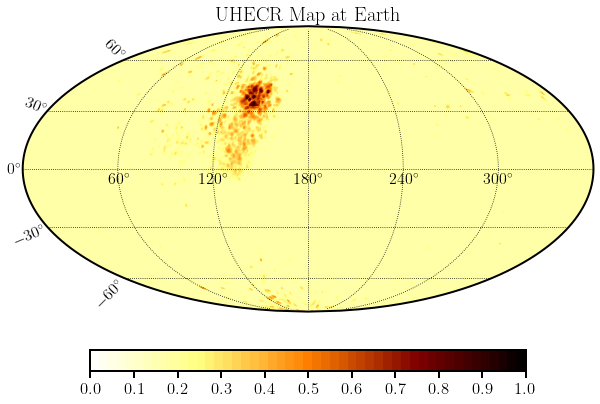

In [ ]:
# UHECR at earth after lensing
# lons_lensed, lats_lensed = -np.rad2deg(np.pi - ph), np.rad2deg(np.pi / 2. - th)
# max_count = int(np.max(map_lensed))
# from scipy.interpolate import griddata
max_prob = np.max(map_lensed)
grid_lons, grid_lats = np.mgrid[-180:180:300j, -90:90:300j]

grid_map_lensed = griddata((lons_crmap, lats_crmap), map_lensed / max_prob, (grid_lons, grid_lats), method="cubic", fill_value=0)

# energy_bins = np.arange(0, int(np.max(map_lensed))+1, 1)
# uhecr_norm = mcolors.BoundaryNorm(energy_bins, cm.hot_r.N)


skymap = AllSkyMap(lon_0=180)
skymap.set_gridlines(color="k", linestyle=":", lw=10, zorder=1)
im = skymap.ax.contourf(grid_lons, grid_lats, grid_map_lensed, transform=ccrs.PlateCarree(), cmap=cm.afmhot_r, levels=np.linspace(0, 1, 50), alpha=1)
skymap.ax.set_facecolor('w')
skymap.title("UHECR Map at Earth")
cbar = skymap.fig.colorbar(im,  pad=0.1,
                                cmap=im.cmap,
                                orientation='horizontal',
                                alpha=1, shrink=0.65)

# cbar.ax.set_xlim(0, int(np.max(map_lensed))+1)
# cbar.ax.set_xticks(np.arange(0, int(np.max(map_unlensed))+1, 1))
cbar.set_ticks(np.arange(0, 1.1, 0.1))
cbar.set_ticklabels(["{0:.1f}".format(i) for i in np.arange(0, 1.1, 0.1)])

# cbar.set_alpha(im.alpha)
# cbar.draw_all()

In [ ]:
lons_earth.shape[0]

26800

[None]

<Figure size 504x360 with 0 Axes>

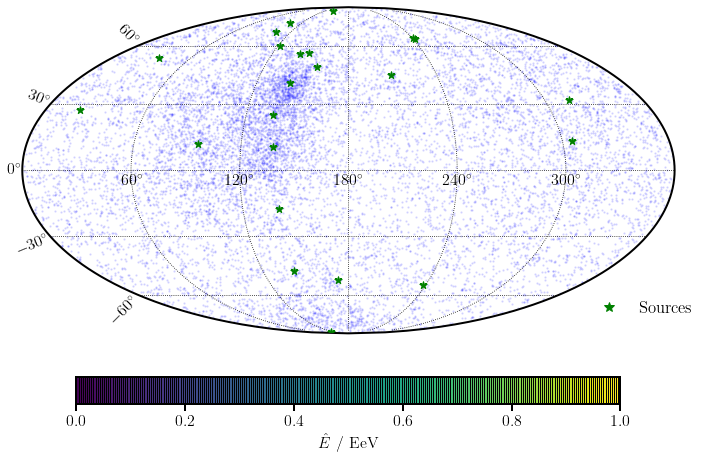

In [ ]:
# UHECR at earth after lensing
lons_earth, lats_earth = 180 - coord_nlarge.galactic.l.deg, coord_nlarge.galactic.b.deg
lons_src, lats_src = 180 - coord_src.galactic.l.deg, coord_src.galactic.b.deg

# lons_gb, lats_gb = coord_gb.galactic.l.deg, coord_gb.galactic.b.deg
# lons_src, lats_src = coord_src.galactic.l.deg, coord_src.galactic.b.deg

skymap = AllSkyMap(figsize=(15,8), lon_0=180)
skymap.set_gridlines(color="k", linestyle=":", lw=10, zorder=1)

energy_bins = np.logspace(np.log(np.min(energies_nlarge)), np.log(np.max(energies_nlarge)), 4, base=np.e)
uhecr_norm = mcolors.BoundaryNorm(energy_bins, cm.hot.N)


# healpy.mollview(map=map_lensed, fig=skymap.fig.number, rot=(90, 0, 0), cmap=cm.hot)

# handles = [mlines.Line2D([], [], color='r', marker='o', lw=0,
#                           markersize=8, alpha=0.3, label="UHECR"),
        #    mlines.Line2D([], [], color='b', marker='o', lw=0,
        #                   markersize=8, alpha=0.3, label="UHECR from Background"),
handles = [mlines.Line2D([], [], color='g', marker='*', lw=0,
                          markersize=10, label="Sources")]
sc = skymap.scatter(lons_earth, lats_earth, s=2.0, color="b", cmap=cm.hot, alpha=0.1, label="UHECR from Sources", marker="o", zorder=1, lw=0)
# skymap.scatter(lons_gb[:, bg_indices], lats_gb[:, bg_indices], s=2.0, color="b", alpha=0.15, label="UHECR from Background")
skymap.scatter(lons_src, lats_src, s=60.0, color="g", alpha=1.0, marker="*", label="Sources", zorder=10)
# im = skymap.ax.contourf(grid_lons, grid_lats, grid_map_lensed, transform=ccrs.PlateCarree(), cmap=cm.binary, levels=np.linspace(0, 1, 50), alpha=0.2, zorder=0)
skymap.legend(handles=handles, bbox_to_anchor=(0.85, 0.15)) 

# TODO: fix lines in cbar
# TODO: create map by interpolating with large sampling of M.getRandomParticles() + scipy.interpolate.griddata
# and overlay it below the current map
# cb_ax = plt.axes([0.25, 0.07, .5, .05], frameon=False)
bar = skymap.fig.colorbar(sc, pad=0.1,norm=uhecr_norm,
                                cmap=cm.hot,
                                orientation='horizontal',
                                drawedges=True,
                                alpha=1, shrink=0.65)
bar.set_label('$\hat{E}$ / EeV', color='k', fontsize=16)
bar.ax.tick_params(labelsize=16)
bar.solids.set(alpha=1)

[None]

<Figure size 504x360 with 0 Axes>

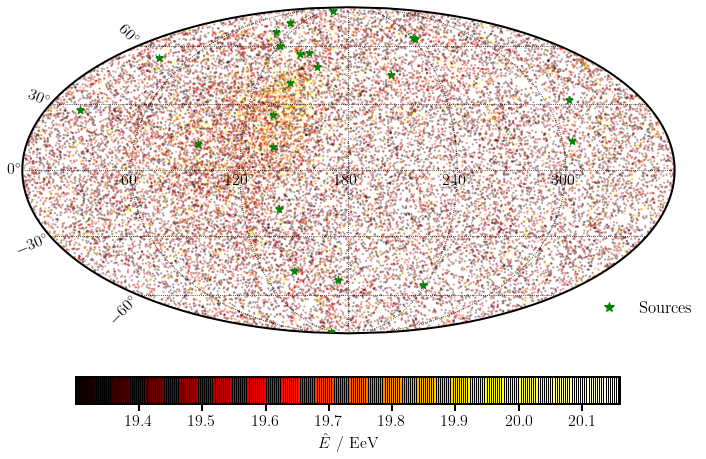

In [ ]:
# UHECR at earth after lensing
lons_earth, lats_earth = 180 - coord_nlarge.galactic.l.deg, coord_nlarge.galactic.b.deg
lons_src, lats_src = 180 - coord_src.galactic.l.deg, coord_src.galactic.b.deg

# lons_gb, lats_gb = coord_gb.galactic.l.deg, coord_gb.galactic.b.deg
# lons_src, lats_src = coord_src.galactic.l.deg, coord_src.galactic.b.deg

skymap = AllSkyMap(figsize=(15,8), lon_0=180)
skymap.set_gridlines(color="k", linestyle=":", lw=10, zorder=1)

energy_bins = np.logspace(np.log(np.min(energies_nlarge)), np.log(np.max(energies_nlarge)), 4, base=np.e)
uhecr_norm = mcolors.BoundaryNorm(energy_bins, cm.hot.N)


# healpy.mollview(map=map_lensed, fig=skymap.fig.number, rot=(90, 0, 0), cmap=cm.hot)

# handles = [mlines.Line2D([], [], color='r', marker='o', lw=0,
#                           markersize=8, alpha=0.3, label="UHECR"),
        #    mlines.Line2D([], [], color='b', marker='o', lw=0,
        #                   markersize=8, alpha=0.3, label="UHECR from Background"),
handles = [mlines.Line2D([], [], color='g', marker='*', lw=0,
                          markersize=10, label="Sources")]
sc = skymap.scatter(lons_earth, lats_earth, s=2.0, color=np.log10(energies_nlarge), cmap=cm.hot, alpha=0.25, label="UHECR from Sources", marker="o", zorder=1)
# skymap.scatter(lons_gb[:, bg_indices], lats_gb[:, bg_indices], s=2.0, color="b", alpha=0.15, label="UHECR from Background")
skymap.scatter(lons_src, lats_src, s=60.0, color="g", alpha=1.0, marker="*", label="Sources", zorder=10)
# im = skymap.ax.contourf(grid_lons, grid_lats, grid_map_lensed, transform=ccrs.PlateCarree(), cmap=cm.binary, levels=np.linspace(0, 1, 50), alpha=0.2, zorder=0)
skymap.legend(handles=handles, bbox_to_anchor=(0.85, 0.15)) 

# TODO: fix lines in cbar
# TODO: create map by interpolating with large sampling of M.getRandomParticles() + scipy.interpolate.griddata
# and overlay it below the current map
# cb_ax = plt.axes([0.25, 0.07, .5, .05], frameon=False)
bar = skymap.fig.colorbar(sc, pad=0.1,norm=uhecr_norm,
                                cmap=cm.hot,
                                orientation='horizontal',
                                drawedges=True,
                                alpha=1, shrink=0.65)
bar.set_label('$\hat{E}$ / EeV', color='k', fontsize=16)
bar.ax.tick_params(labelsize=16)
bar.solids.set(alpha=1)

Observed UHECRs: 357


<Figure size 504x360 with 0 Axes>

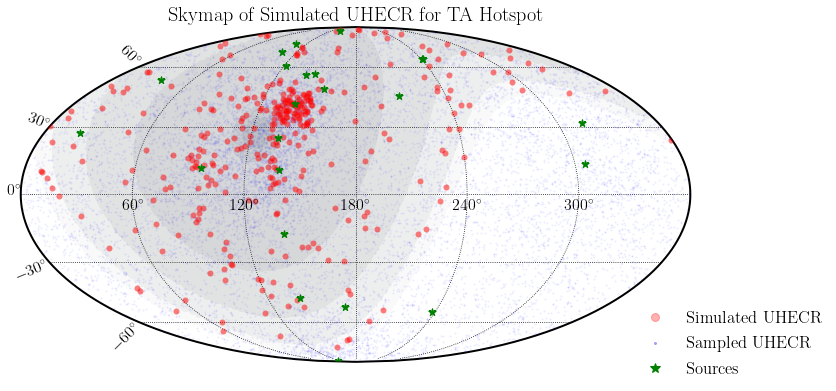

In [51]:
# after applying energy threshold cuts
# UHECR at earth after lensing
lons_earth, lats_earth = 180 - coord_nlarge.galactic.l.deg, coord_nlarge.galactic.b.deg
lons_det, lats_det = 180 - coord_det.galactic.l.deg, coord_det.galactic.b.deg

skymap = AllSkyMap(lon_0=180)
skymap.set_gridlines(color="k", linestyle=":", lw=10, zorder=1)

skymap.scatter(lons_det, lats_det, color="r", alpha=0.5, label="UHECR_truncated", marker="o", zorder=5, lw=0)
skymap.scatter(lons_src, lats_src, s=60.0, color="g", alpha=1.0, marker="*", label="Sources", zorder=10)
skymap.scatter(lons_earth[:13400], lats_earth[:13400], s=4.0, color="b", alpha=0.075, label="UHECR_Earth", marker="o", zorder=4, lw=0)

skymap.exposure_map(detector_params, zorder=1)

handles = [mlines.Line2D([], [], color='r', marker='o', lw=0,
                          markersize=8, alpha=0.3, label="Simulated UHECR"),
           mlines.Line2D([], [], color='b', marker='o', lw=0,
                          markersize=2, alpha=0.3, label="Sampled UHECR"),
            mlines.Line2D([], [], color='g', marker='*', lw=0,
                          markersize=10, label="Sources")]

skymap.legend(handles=handles, bbox_to_anchor=(0.9, 0.2)) 
# ax.scatter(np.pi - lons_earth, lats_earth, s=20.0, color="r", alpha=0.5)
# sc = ax.scatter(np.pi - lons_det, lats_det, s=20.0, c=np.log10(energies_det * 1e18), cmap=cm.hot)
# ax.scatter(np.pi - lons_gb[:, :], lats_gb[:, :], s=2.0, color="b", alpha=0.1)
# ax.scatter(np.pi - lons_src, lats_src, s=10.0, color="g", alpha=0.9, marker="+")
# ax.grid()
skymap.title("Skymap of Simulated UHECR for TA Hotspot")
skymap.save("skymap_result.png",bbox_inches="tight", dpi=300, transparent=True)
# fig.colorbar(sc)

print("Observed UHECRs:",  len(lons_det))

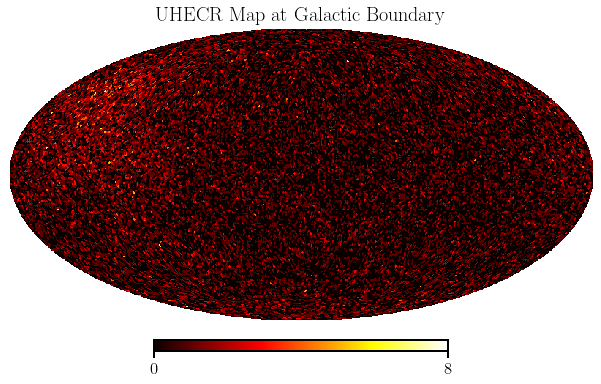

In [9]:
healpy.mollview(map=map_unlensed, title='UHECR Map at Galactic Boundary', rot=(0, 0, 0), cmap=cm.hot)

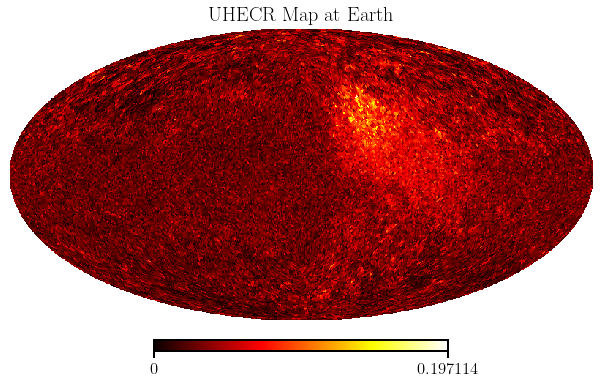

In [14]:
healpy.mollview(map=map_lensed, title='UHECR Map at Earth', rot=(0, 0, 0), cmap=cm.hot)